# The Linear Bandit Problem

On a general level, the multi-armed bandit problem can be viewed as solving an optimization problem of the form, 
$$
\min_{a\in\mathcal{A}} f(a)
$$
where the function $f$ is unknown and only noisy measurements of the form
$$
X_t = f(A_t) + W_t
$$
are available.

So far, we have dealt with the case $\mathcal{A}$ is a finite set. However, in many applications it is desirable to optimize multiple continuous variables simultaneously. The simplest continuous-variable version of the multi-armed bandit is known as the *linear bandit* problem. In this case $\mathcal{A}\subset\mathbb{R}^n$ and $f(a) = a^\top \theta^\star$ for an unknown vector, $\theta^\star$. So, then the measurements / rewards have the form:
$$
X_t = A_t^\top \theta^\star + W_t
$$

In this case, we are trying to choose a sequence of action vectors, $A_t$, to maximize the cumulative reward:
$$
\sum_{s=1}^t X_t.
$$

# Theory Question 1

Explain how the finite-action multi-armed bandit problem we studied in class and in Homework 5 can be viewed as a special case of the linear bandit problem.

Write your answer here or attach a hand-written note.

# Linear Upper Confidence Bound Algorithm

A natural extension of the upper confidence bound algorithm can be devised for the linear bandit problem. Namely, at each time, $t$, say can compute a set $\mathcal{C}_t$ that contains $\theta^\star$ with high probability based on the measurements $(A_1,X_1),\ldots,(A_{t-1},X_{t-1})$. Then for each action, $a\in\mathcal{A}$ the corresponding upper confidence bound given by:
$$
\mathrm{UCB}_t(a) = \max_{\theta\in\mathcal{C}_t} a^\top \theta.
$$
Note that $\mathrm{UCB}_t(a)$ gives an upper bound on the largest plausible value that $a^\top\theta^\star$ could take.

Chapter 19 of the book by Lattimore and Szepesvari goes into greater detail about this algorithm and gives some bounds on its  regret.

# Theory Question 2

Assume that $W_t$ are $\sigma$-sub-Gaussian, and independent of $X_1,\ldots,X_{t-1}$ and $A_1,\ldots,A_t$. Let $\hat\theta_t$ be the regularized least-squares solution:
$$
\hat\theta_t = \mathrm{argmin}_{\theta} \sum_{s=1}^t (X_s - A_t^\top \theta)^2 + \alpha \|\theta\|^2,
$$
where $\alpha >0$.

Say that $V_t = \alpha I + \sum_{s=1}^t A_s A_s^\top$, $B\ge \|\theta^\star\|$ and 
$$
\beta_t = \left(
\alpha B
+\sigma\sqrt{\log\det V_t + \log(\delta^{-2} \alpha^{-n})}
\right)^2
$$
Let 
$$
\mathcal{C}_t= \left\{ \theta\in\mathbb{R}^n \middle| (\theta-\hat\theta_t)^\top V_t (\theta-\hat \theta_t) \le \beta_t \right\}
$$

Explain why $\theta^\star \in\mathcal{C}_t$ with probability at least $1-\delta$.

Write your answer here or attach a hand-written note.

# Lagrange Duality in a Nutshell

Computing $\mathrm{UCB}_t(a)$ is an optimization problem with a single inequality constraint:

\begin{align*}
& \max_{\theta} && a^\top \theta \\
&\textrm{subject to} && (\theta-\hat\theta_t)^\top V_t (\theta-\hat \theta_t) \le \beta_t 
\end{align*}

It is a special case of the general setup like:
\begin{align*}
& \max_{x\in \mathbb{R}^n} && f(x) \\
&\textrm{subject to} && g(x) \ge 0
\end{align*}


Solving such a constrained optimization problem typically utilizes Lagrangian duality. Namely, we first define a Lagrangian:
$$
L(x,\lambda) = f(x) + \lambda g(x).
$$
where $\lambda\in\mathbb{R}$.

The dual function is defined by:
$$
d(\lambda) = \max_{x\in\mathbb{R}^n} L(x,\lambda).
$$

If $x\in\mathbb{R}^n$ is feasible for the original problem, then $g(x)\ge 0$. Then if $\lambda \ge 0$, we we that
\begin{align*}
f(x) &\le f(x) + \lambda g(x) \\
&= L(x,\lambda) \\
&\le \max_{y\in \mathbb{R}^n} L(y,\lambda) \\
&= d(\lambda)
\end{align*}

In other words, if $x$ is feasible and $\lambda \ge 0$, then $f(x)\le d(\lambda)$. This principle is known as *weak duality*.

If we found a feasible $x^\star$ and $\lambda^\star \ge 0$ such that $f(x^\star) = d(\lambda^*)$, then $x^\star$ must be optimal. Indeed, for any other feasible $x$, we must have that $f(x^\star)=d(\lambda^*)\ge f(x)$.  

Note that in order to have $f(x^\star) = d(\lambda^\star)$, the relationship $f(x^\star)\le f(x^\star)+\lambda^\star g(x^\star) \le d(\lambda^\star)$ implies that we must have that $\lambda^\star g(x^\star)=0$. In particular, if $\lambda^\star >0$, then the constraint holds with equality, $g(x^\star)=0$. 

# Theory Question 4

Show that 
$$
\mathrm{UCB}_t(a) = a^\top \hat\theta_t + \sqrt{\beta_t} \| V_t^{-1/2} a\|.
$$

Hint: Set up the Lagrangian for some $\lambda >0$. Maximize the Lagrangian with respect to $\theta$. Then choose $\lambda$ so that the constraint holds with equality. 

# Theory Question 5

A function, $f:\mathbb{R}^n\to\mathbb{R}$ is called convex if for any $x,y\in\mathbb{R}^n$ and any $\gamma \in [0,1]$, we have that
$$
f(\gamma x + (1-\gamma) y) \le \gamma f(x) + (1-\gamma) f(y)
$$

Show that $\mathrm{UCB}_t(a)$ is a convex function of $a\in\mathbb{R}^n$. (Hint: Use the triangle inequality)

# Limitations of Linear UCB

We have seen that $\mathrm{UCB}_t(a)$ is a convex function. While minimizing convex functions is tractable, maximizing them is not. As a result, applications of the linear UCB method are often restricted to the case that $\mathcal{A}$ is a finite set. I this case, the maximum UCB is found by simply calculating $\mathrm{UCB}_t(a)$ for each action and taking the best one. 

The finite set, $\mathcal{A}$, could be found by gridding an action space of interest. However, the number of grid points required grows exponentially with $n$, the dimension of $a$. As a result, gridding and doing linear UCB only works on fairly low-dimensional problems.



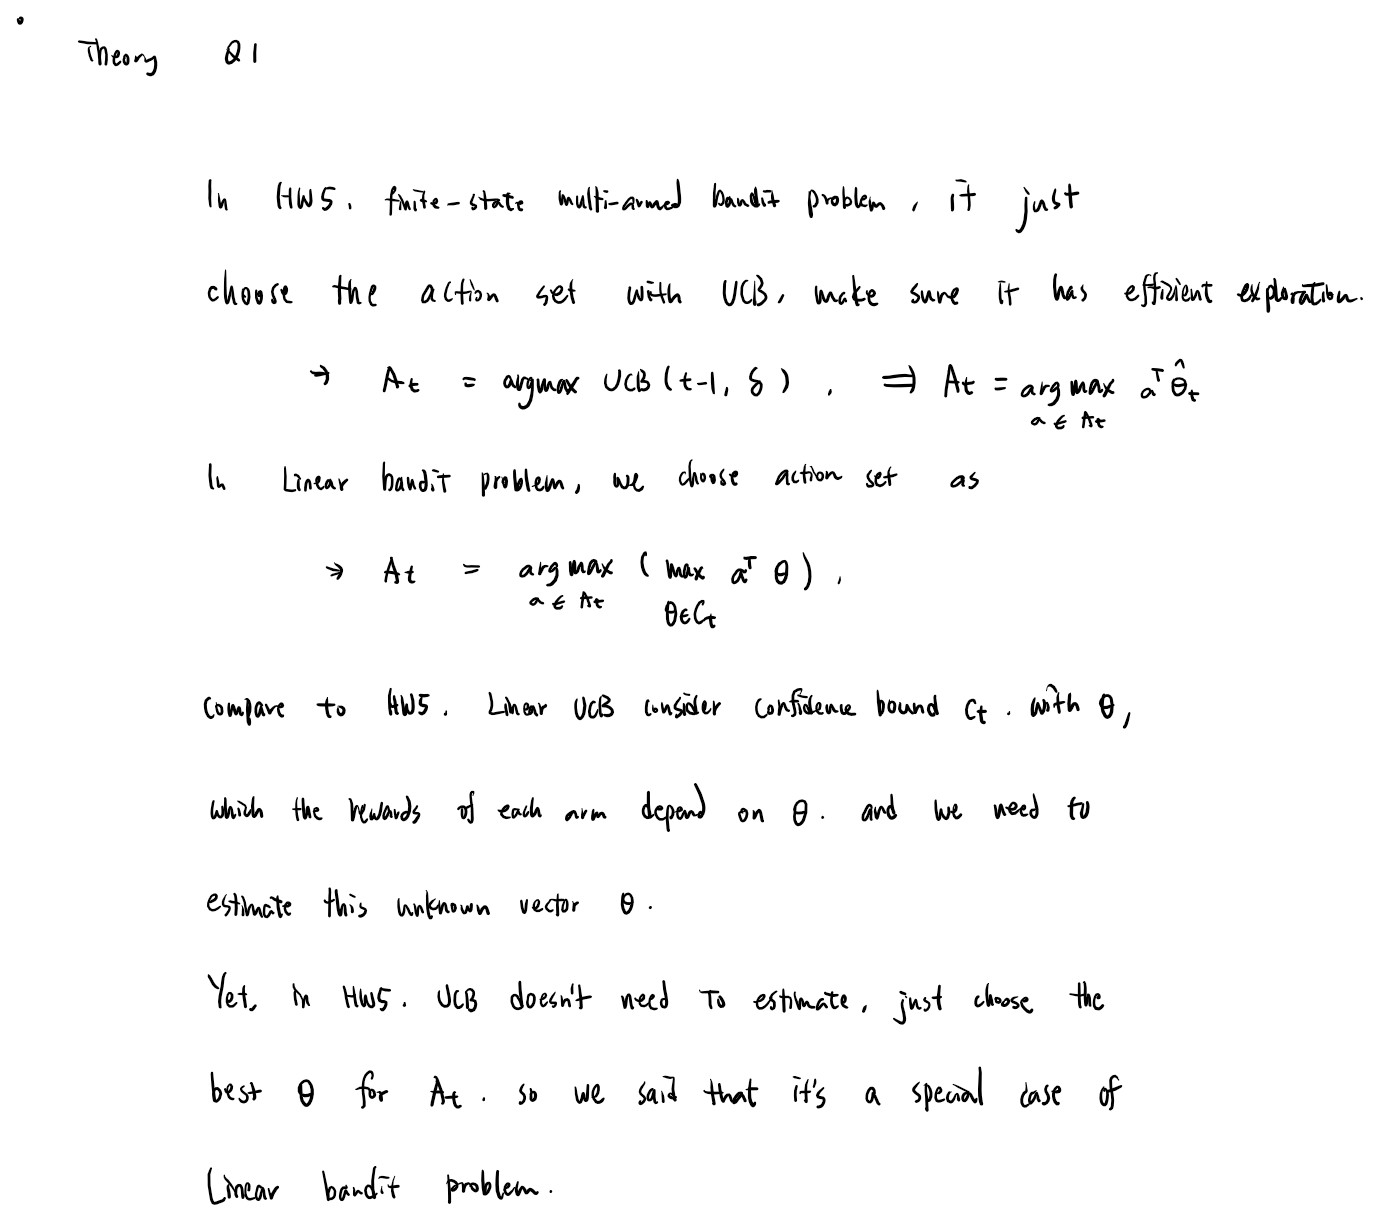

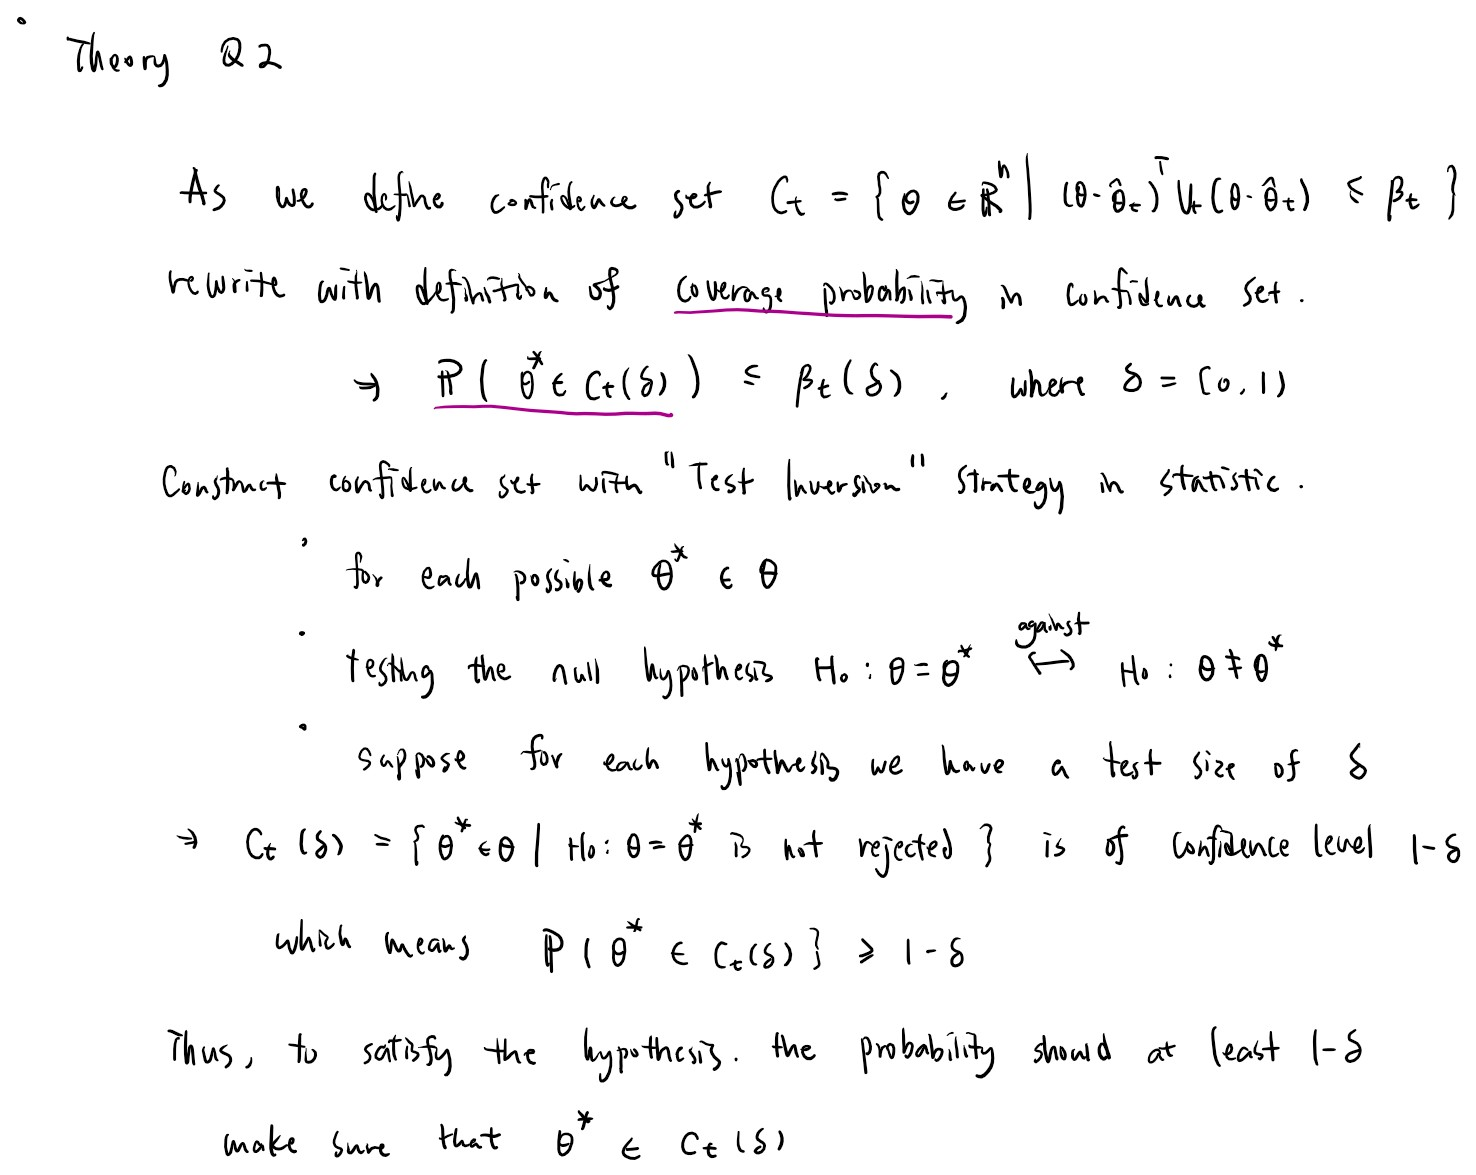

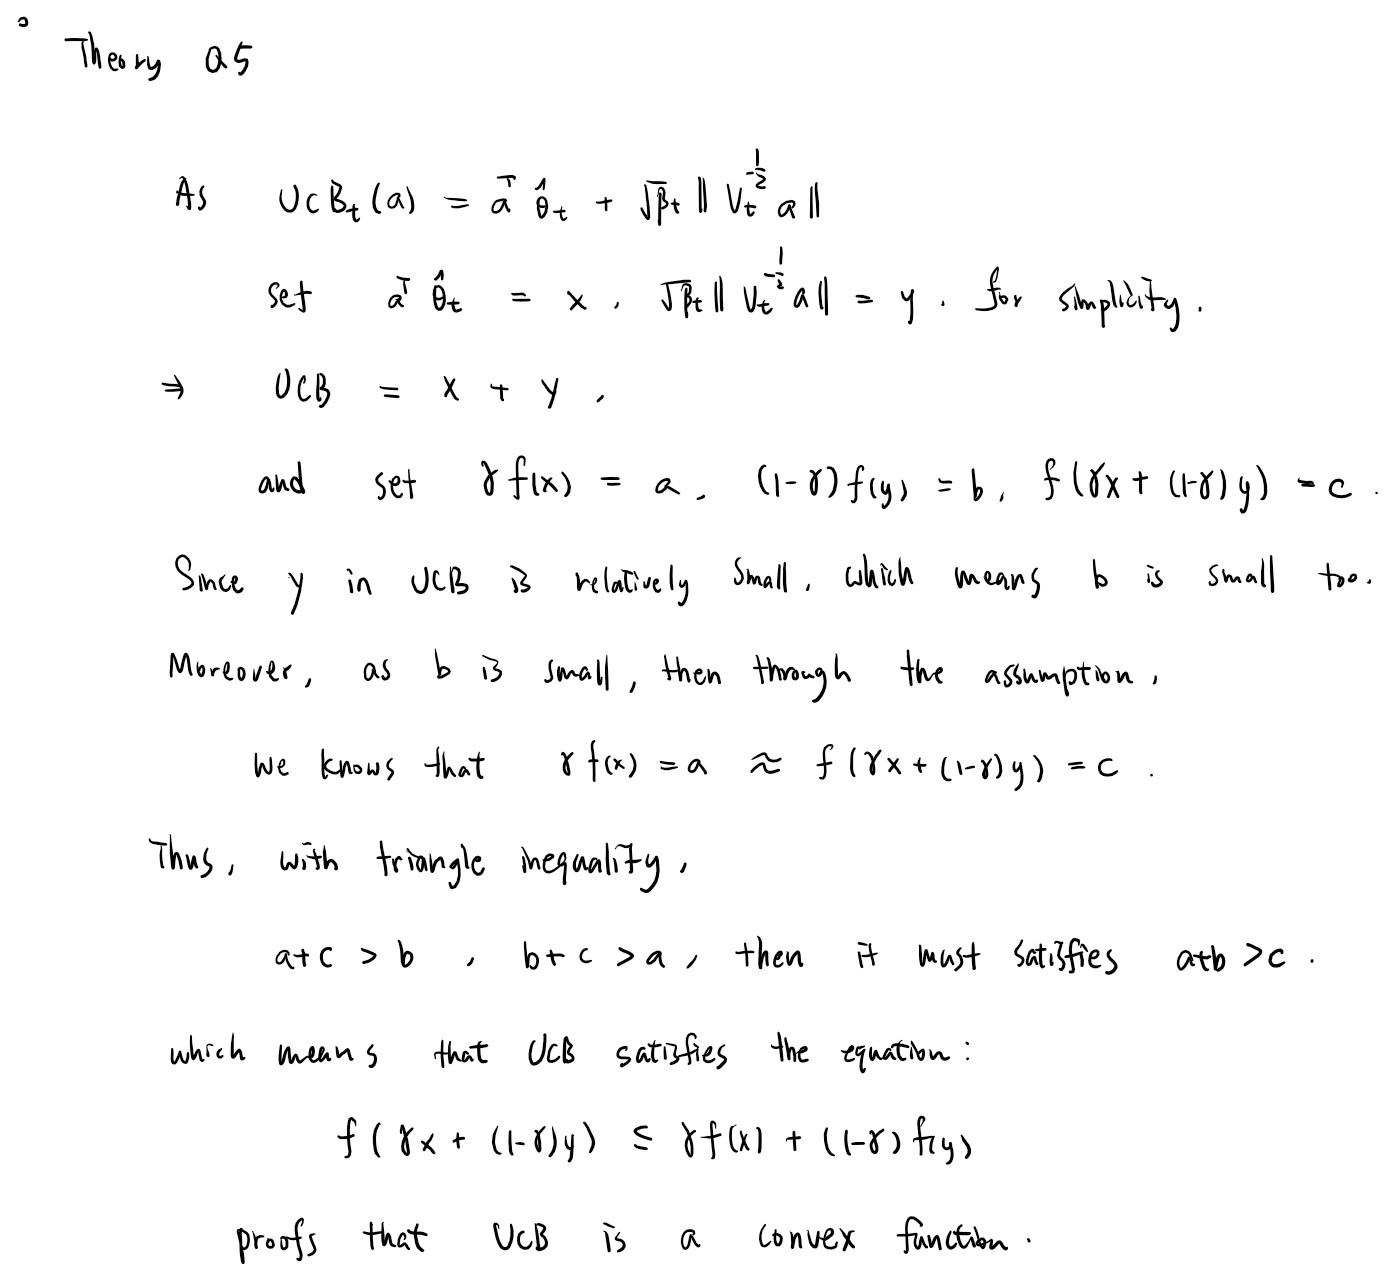

# Coding Question 1

Say that $\theta^\star\in\mathbb{R}^2$ and $W_t$ are given as below. Assume that it is desired to maximize $a^\top \theta^\star$ where $a$ is within the unit disc. In other words, $\|a\|\le 1$. It can be shown  that the optimal action has the form $a = \frac{1}{\|\theta^\star\|}\theta^\star$ and so the optimal average reward is $\|\theta^\star\|$. In particular, the best action is on the unit circle. As a result, a reasonable discretization for this problem is to take actions of the form
$$
a_i = \begin{bmatrix}
\cos(\omega_i) \\
\sin(\omega_i)
\end{bmatrix}
$$
where $\omega_1,\ldots,\omega_K$ form a uniform gridding of $[0,2\pi]$.

Implement the linear UCB algorithm for $K=2,5,10$ and plot the regret:
$$
\sum_{s=1}^T (\|\theta^\star\| - X_s)
$$

(You can choose how to set $\alpha$ and $\delta$ in the algorithm.)

Plot all of the regrets on the same plot and use a legend so that you can visually see the differences in the regret.

What you will see  is that the performance depends fairly strongly on how you did the gridding. Namely, if the optimal solution happens to fall near one of the grid points, the regret will be low. So, for sparse grids, it is likely that the regret will be high, but not necessarily.

#### == Use LinUCB Algorithm as reference ==

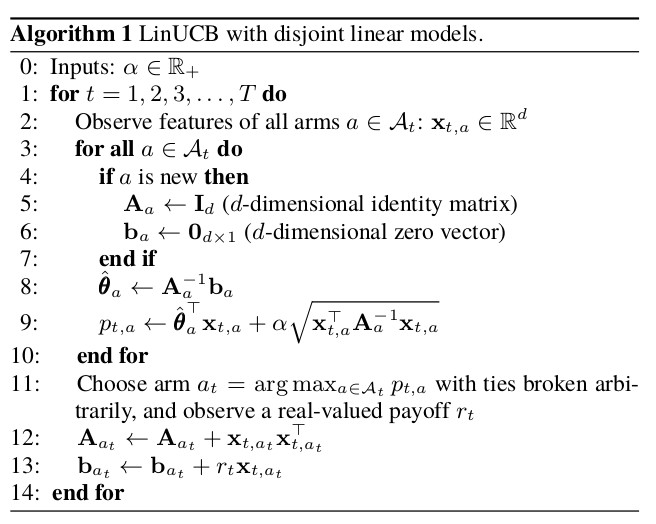

In [62]:
import numpy as np
import numpy.random as rnd
import scipy.linalg as la
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as st
%matplotlib inline

thetaStar = rnd.uniform(-1,1,2)         # randomly create 2 numbers [-1, 1]
NumSteps = 10000
sigma = .5
W = sigma * rnd.randn(NumSteps)         # random rewards?



In [12]:
class LinUCB_Disjoint_Arm:
    
    def __init__(self, arm_index, d, alpha):
        
        # Track arm index
        self.arm_index = arm_index
        
        # Keep track of alpha
        self.alpha = alpha
        
        # V: (d x d) matrix = V_s.T * V_s + I_d. (d:dimension)
        # The inverse of A is used in ridge regression 
        self.V = np.identity(d)
        
        # theta: (d x 1) corresponding response vector. 
        # Equals to D_a.T * c_a in ridge regression formulation
        self.theta = np.zeros([d,1])
        
    def Compute_UCB(self, thetaStar):
        # Find A inverse for ridge regression
        V_inv = np.linalg.inv(self.V)
        
        # Perform ridge regression to obtain estimate of covariate coefficients theta
        # theta_hat is (d x 1) dimension vector
        self.theta_hat = np.dot(V_inv, self.theta)
        
        # Reshape covariates input into (d x 1) shape vector
        x = thetaStar.reshape([-1,1])
        
        # Find ucb based on p formulation (mean + std_dev) 
        # p is (1 x 1) dimension vector
        p = np.dot(self.theta_hat.T,x) +  self.alpha * np.sqrt(np.dot(x.T, np.dot(V_inv,x)))

        return p
    
    def Reward_Update(self, reward, thetaStar):
        # Reshape covariates input into (d x 1) shape vector
        x = thetaStar.reshape([-1,1])
        
        # Update A which is (d * d) matrix.
        self.V += np.dot(x, x.T)
        
        # Update b which is (d x 1) vector
        # reward is scalar
        self.theta += reward * x

In [8]:
class LinUCB_Policy:
    
    def __init__(self, K_arms, d, alpha):
        # Initialize variables 
        self.K_arms = K_arms
        self.linucb_arms = [LinUCB_Disjoint_Arm(arm_index = 1, d = d, alpha = alpha) for i in range(K_arms)]
        
    def select_arm(self, thetaStar):
        # Initiate ucb to be 0
        highest_ucb = -1
        
        # Track index of arms to be selected on if they have the max UCB.
        candidate_arms = []
        
        for arm_index in range(self.K_arms):
            # Calculate ucb based on each arm using current covariates at time t
            arm_ucb = self.linucb_arms[arm_index].Compute_UCB(thetaStar)
            
            # If current arm is highest than current highest_ucb
            if arm_ucb > highest_ucb:
                
                # Set new max ucb
                highest_ucb = arm_ucb
                
                # Reset candidate_arms list with new entry based on current arm
                candidate_arms = [arm_index]

            # If there is a tie, append to candidate_arms
            if arm_ucb == highest_ucb:
                
                candidate_arms.append(arm_index)
        
        # Choose based on candidate_arms randomly (tie breaker)
        chosen_arm = np.random.choice(candidate_arms)
        
        return chosen_arm

100%|██████████| 10000/10000 [00:04<00:00, 2481.07it/s]


Text(0, 0.5, 'Regret')

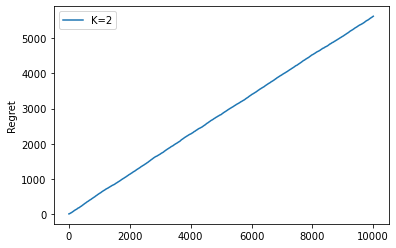

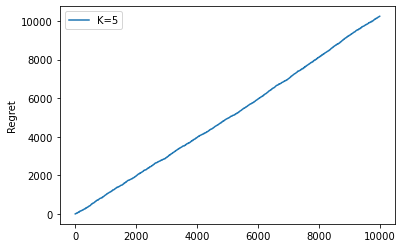

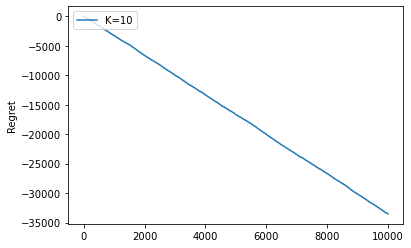

In [61]:
# K-arm bandit variables
K2 = 2              # 2 lever to pull
K5 = 5
K10 = 10

# In this case, I just set alpha >= 1
alpha = 1.5           # increasing constant for confidence set (Ct < alpha)
d = 2               # dimensions

AgentRewards_2 = []
AgentRewards_5 = []
AgentRewards_10 = []

# Initiate policy & UCB
LinUCB_Policy_Object_2 = LinUCB_Policy(K2, d, alpha)
LinUCB_Disjoint_Arm_Object_2 = LinUCB_Disjoint_Arm(K2, d, alpha)

LinUCB_Policy_Object_5 = LinUCB_Policy(K5, d, alpha)
LinUCB_Disjoint_Arm_Object_5 = LinUCB_Disjoint_Arm(K5, d, alpha)

LinUCB_Policy_Object_10 = LinUCB_Policy(K10, d, alpha)
LinUCB_Disjoint_Arm_Object_10 = LinUCB_Disjoint_Arm(K10, d, alpha)

# Update rewards
for step in tqdm(range(NumSteps)):
    
    reward_2 = LinUCB_Policy_Object_2.select_arm(thetaStar)                     # Choose the max rewards from the arm 
    LinUCB_Disjoint_Arm_Object_2.Reward_Update(reward_2, thetaStar)             # Update the reward value
    AgentRewards_2.append(reward_2)                                             # Record the updated reward     
    
    reward_5 = LinUCB_Policy_Object_5.select_arm(thetaStar)                     # Choose the max rewards from the arm 
    LinUCB_Disjoint_Arm_Object_5.Reward_Update(reward_5, thetaStar)             # Update the reward value
    AgentRewards_5.append(reward_5)                                             # Record the updated reward   
    
    reward_10 = LinUCB_Policy_Object_10.select_arm(thetaStar)                   # Choose the max rewards from the arm 
    LinUCB_Disjoint_Arm_Object_10.Reward_Update(reward_10, thetaStar)           # Update the reward value
    AgentRewards_10.append(reward_10)                                            # Record the updated reward   
    
# Calculate regrets
mu_2 = rnd.randn(K2)                                                            # random mean (ex. [0.1 0.2 0.6 3])
bestMu_2 = np.max(mu_2)
Regret_2 = bestMu_2 * np.arange(1,NumSteps+1) - np.cumsum(AgentRewards_2)

mu_5 = rnd.randn(K5)                                                            # random mean (ex. [0.1 0.2 0.6 3])
bestMu_5 = np.max(mu_5)
Regret_5 = bestMu_5 * np.arange(1,NumSteps+1) - np.cumsum(AgentRewards_5)

mu_10 = rnd.randn(K10)                                                            # random mean (ex. [0.1 0.2 0.6 3])
bestMu_10 = np.max(mu_10)
Regret_10 = bestMu_10 * np.arange(1,NumSteps+1) - np.cumsum(AgentRewards_10)

# Plot the regrets
plot1 = plt.figure(1)
plt.plot(Regret_2,label = 'K=2')  
plt.legend(loc='upper left')
plt.ylabel('Regret')

plot2 = plt.figure(2)
plt.plot(Regret_5,label = 'K=5')  
plt.legend(loc='upper left')
plt.ylabel('Regret')

plot2 = plt.figure(3)
plt.plot(Regret_10,label = 'K=10')  
plt.legend(loc='upper left')
plt.ylabel('Regret')


# Getting Ready for Thompson Sampling: Bayes Rule for Gaussians

In the rest of the homework, we will build up to a methodology, known as Thompson sampling, that circumvents the convexity problem described above. The algorithm is built on Bayesian sampling. We will just deal with the simple case in which all of the variables are assumed to be Gaussian.

Say that $X\in\mathbb{R}^m$ and $Y\in\mathbb{R}^n$ are jointly Gaussian vectors with 
$$
\mathbb{E}\left[
\begin{bmatrix}
X \\
Y
\end{bmatrix}
\right] = \begin{bmatrix}
\bar x \\
\bar y
\end{bmatrix}
\quad
\mathbb{E}\left[
\begin{bmatrix}
X-\bar x \\
Y-\bar y
\end{bmatrix}
\begin{bmatrix}
X-\bar x \\
Y-\bar y
\end{bmatrix}^\top
\right] = \begin{bmatrix}
A & B^\top \\
B & C
\end{bmatrix}.
$$
This means that they have a joint density given by:
$$
p(x,y) = \frac{1}{(2\pi)^{\frac{m+n}{2}} \left(\det
\begin{bmatrix}
A & B^\top \\
B & C
\end{bmatrix}
\right)^{1/2}}\exp\left(
-\frac{1}{2}
\begin{bmatrix}
x-\bar x \\
x-\bar y
\end{bmatrix}^\top
\begin{bmatrix}
A & B^\top \\
B & C
\end{bmatrix}^{-1}
\begin{bmatrix}
x-\bar x \\
x-\bar y
\end{bmatrix}
\right)
$$

Note that we must have that the density of $Y$ is given by:
$$
p(y) = \frac{1}{(2\pi)^{\frac{n}{2}} (\det C)^{1/2}} \exp\left(
-\frac{1}{2}(y-\bar y)^\top C^{-1} (y-\bar y)
\right)
$$
After a bit of matrix algebra, it can be shown that 
$$
p(x|y) = \frac{p(x,y)}{p(y)} = \frac{1}{(2\pi)^{n/2} (\det S)^{1/2}} \exp\left(
-\frac{1}{2}(x-\mu)^\top S^{-1}(x-\mu)
\right)
$$
where 
$$
S = A-B^\top C^{-1}B \quad \mu = \bar x + B^\top C^{-1}(y-\bar y).
$$

In other words, when $X$ is conditioned on $Y$, it is a Gaussian with mean $\mu$ and covariance $S$.



# A Bayesian View of the Linear Bandit Problem

To solve the Bandit problem via Thompson sampling, we will need to put it into a Bayesian setting. That is, we will assume that $\theta^\star$ is a random variable. For tractability, we will start with a prior distribution that $\theta^\star$ is a Gaussian vector with mean $\mu_0$ and covariance $P_0$. We will also assume that $W_t$ are IID Gaussian scalars with mean $0$ and variance $\sigma^2 I$ that are indepent of $\theta^\star$. We still have the same problem setup of trying to choose $A_t$ to maximize 
$$
X_t = A_t^\top \theta^\star + W_t
$$

# The Means and Covariances

Say that $\theta^\star$ conditioned on $X_1,\ldots,X_{t-1}$ and $A_1,\ldots, A_{t-1},A_t$ is a Gaussian random variable with mean $\mu_{t-1}$ and covariance $P_{t-1}$. Assume that $W_t$ is independent of $X_1,\ldots,X_{t-1}$ and $A_1,\ldots, A_{t-1},A_t$. The mean and covariance of 
$$
\begin{bmatrix}
\theta^\star \\
X_t
\end{bmatrix}
$$
conditioned on $\mathcal{F}_{t-1}=\sigma\{X_1,\ldots,X_{t-1},A_1,\ldots, A_{t-1},A_t\}$ are given by
\begin{align*}
\mathbb{E}
\left[
\begin{bmatrix}
\theta^\star \\
X_t
\end{bmatrix}
\middle|
\mathcal{F}_{t-1}
\right] &= \begin{bmatrix}
\mu_{t-1}\\
A_t^\top \mu_{t-1}
\end{bmatrix}  \\
\mathbb{E}
\left[
\begin{bmatrix}
\theta^\star - \mu_{t-1}\\
X_t - A_t^\top \mu_{t-1}
\end{bmatrix}
\begin{bmatrix}
\theta^\star - \mu_{t-1}\\
X_t - A_t^\top \mu_{t-1}
\end{bmatrix}^\top
\middle|
\mathcal{F}_{t-1}
\right] &= \begin{bmatrix}
P_{t-1} & P_{t-1}A_t \\
A_t^\top P_{t-1}& A_t^\top P_{t-1} A_t + \sigma^2
\end{bmatrix} 
\end{align*}
Here $\mathcal{F}_{t-1}$ is the $\sigma$-algebra generated by $\{X_1,\ldots,X_{t-1},A_1,\ldots, A_{t-1},A_t\}$.


# Theory Question 6

Using Bayes rule for Gaussians, calculate the mean, $\mu_t$, and covariance, $P_t$, of $\theta^\star$ conditioned on $X_1,\ldots,X_{t-1},X_t$ and $A_1,\ldots, A_{t-1},A_t$. (Namely, we are now also conditioning on $X_t$.)

# Thompson Sampling for Linear Bandits

Thompson sampling is probably the earliest algorithm for multi-armed bandits. It was also originally formulated for finite-action problems, but extends nicely to a very general class of bandit and reinforcement learning problems. For the linear bandit problem, it can be expressed as.

At time  $t\ge 1$
* Sample $\theta_t$ as a Gaussian with mean $\mu_{t-1}$ and covariance $P_{t-1}$
* Calculate $A_t = \mathrm{argmax}_{a\in\mathcal{A}} a^\top \theta_t$
* Use action $A_t$ to receive reward $X_t = A_t^\top \theta^\star +W_t$
* Use Bayes rule to calculate $\mu_t$ and $P_t$.

Thompson sampling is sometimes also known as posterior sampling, since at each step, we have that $\theta_t$ is sampled from the posterior distribution $p(\theta^\star | X_1,\ldots,X_{t-1},A_1,\ldots,A_{t-1}).$ 

A subtle, but important point for the analysis is that $A_t$ gives no information about $\theta^\star$ that could not be deduced from  $X_1,\ldots,X_{t-1}$ and $A_1,\ldots,A_{t-1}$. As a result $p(\theta^\star | X_1,\ldots,X_{t-1},A_1,\ldots,A_{t-1})=p(\theta^\star | X_1,\ldots,X_{t-1},A_1,\ldots,A_{t-1},A_t)$

# Coding Question 2

Let $\theta^\star$ and $W_t$ be the same as in the previous coding question. Implement Thompson sampling for linear bandits. Note that in this case $A_t = \frac{1}{\|\theta_t\|}\theta_t$. Plot the regret.

Assume that $\mu_0=0$ and $P_0=I$.

What you will likely see is that Thompson sampling performs about as well as linear UCB with a well-chosen $K$.

In [77]:
# Another way to simulate thompson sampling (Not related to code 1)

E = np.array([1, 9, 3, 2, 7])       # test array for mean
D = np.array([5, 3, 1, 7, 4])       # test array for variance

K = 5                               # K arm bandits
T = 10000                           # number of time step

ESTIMATED_Q = np.ones(K)  
A = np.ones(K)  
B = np.ones(K)  


def thompson_sampling():
    rewards = np.random.normal(E, D)
    rewards = (rewards - np.min(rewards)) / (np.max(rewards) - np.min(rewards))  
    beta_value = np.random.beta(A, B)
    choose_action = np.argmax(beta_value)  
    A[choose_action] += rewards[choose_action]
    B[choose_action] += 1 - rewards[choose_action]
    return rewards[choose_action]


def play_game():
    global ESTIMATED_Q
    ESTIMATED_Q = np.ones(K)
    score = 0
    reward_list = []
    for i in range(T):
        r = thompson_sampling()
        reward_list.append(r)
        
    # Calculate regrets
    mu = rnd.randn(10)                                                            
    bestMu = np.max(mu)
    Regret = bestMu * np.arange(1,T+1) - np.cumsum(reward_list)
    return Regret


No handles with labels found to put in legend.


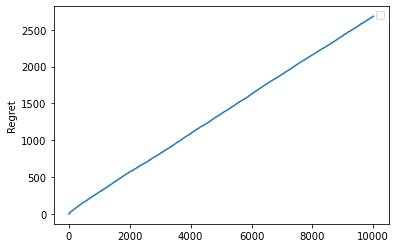

In [78]:
thompson_sampling = play_game()


plt.plot(thompson_sampling)
plt.legend()
plt.ylabel('Regret')
plt.show()